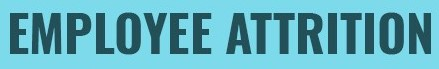

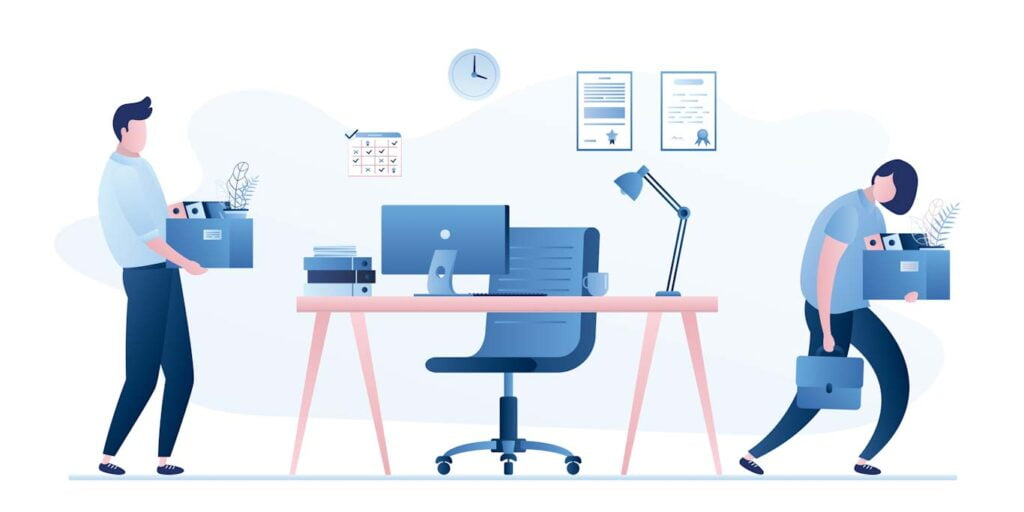

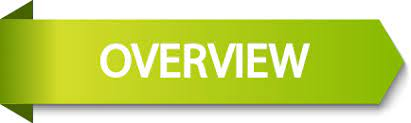

## - Employee attrition can also be termed as Employee churn Rate.

## - Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.


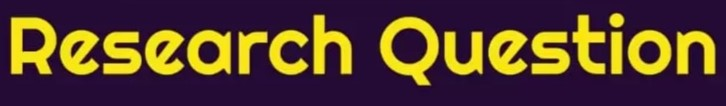

## - Here we will use MFG10YearTerminationData dataset to analyze and predict layoffs and employee churn rate using different Machine Learning Models.

## EDA, Data Cleaning

In [3]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [4]:
''' reading dataset '''
df = pd.read_csv(r"C:\MFG10YearTerminationData.csv")

In [5]:
''' displaying first 5 rows '''
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [6]:
''' shape of data '''
df.shape

(49653, 18)

In [7]:
''' checking null values '''
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [8]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [9]:
''' checking duplicates rows '''
df[df.duplicated()]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT


In [10]:
''' dropping some columns '''
df.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)

In [11]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [12]:
''' unique values in city_name '''
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [13]:
''' unique values in department_name '''
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [14]:
''' unique values in termreason_desc '''
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [15]:
''' unique values in BUSINESS_UNIT '''
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [16]:
''' unique values in job_title '''
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [17]:
''' converting job_title into 3 categories '''

board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [18]:
df.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

In [19]:
''' now change the city_names '''

city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [20]:
''' now converting city_name into rural or town '''
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

In [21]:
df['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [22]:
''' now displaying dataset after mapping values '''
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


Text(0, 0.5, 'Count')

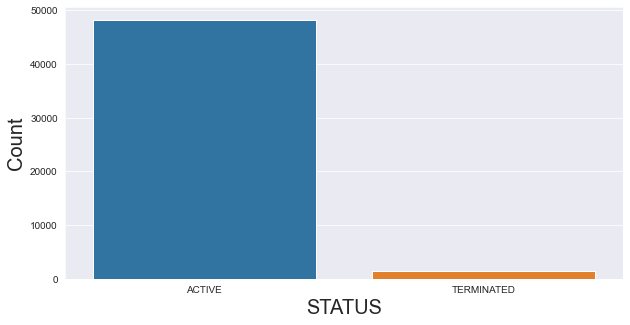

In [23]:
''' barplot of status'''
status_label = df.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

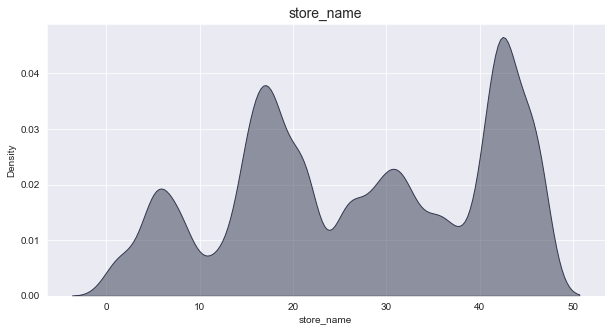

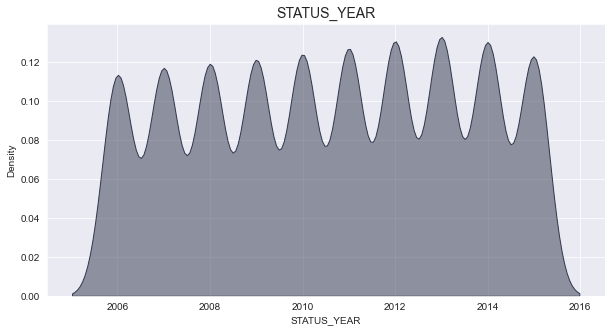

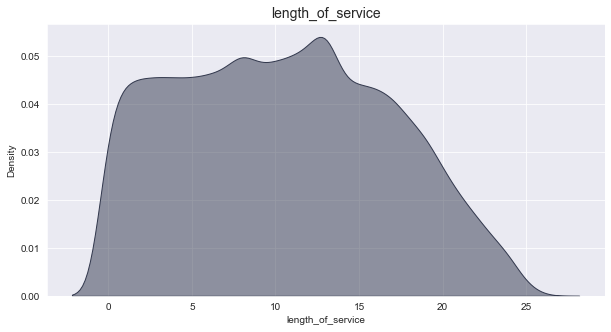

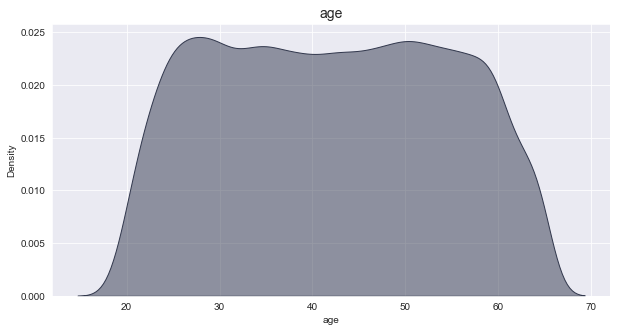

In [24]:
''' kde plot '''
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column], color = '#32384D', shade = True, label = 'terminated', alpha = 0.5)
    plt.title(column, size = 14)

In [25]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [26]:
''' preprocessing of dataset '''

city_name_label = {value: key for key, value in enumerate(df['city_name'].unique())}
df['city_name'] = df['city_name'].map(city_name_label)

department_name_label = {value: key for key, value in enumerate(df['department_name'].unique())}
df['department_name'] = df['department_name'].map(department_name_label)

job_title_label = {value: key for key, value in enumerate(df['job_title'].unique())}
df['job_title'] = df['job_title'].map(job_title_label)

gender_short_label = {value: key for key, value in enumerate(df['gender_short'].unique())}
df['gender_short'] = df['gender_short'].map(gender_short_label)

term_desc_label = {value: key for key, value in enumerate(df['termreason_desc'].unique())}
df['termreason_desc'] = df['termreason_desc'].map(term_desc_label)

termtype_desc_label = {value: key for key, value in enumerate(df['termtype_desc'].unique())}
df['termtype_desc'] = df['termtype_desc'].map(termtype_desc_label)

status_label = {value: key for key, value in enumerate(df['STATUS'].unique())}
df['STATUS'] = df['STATUS'].map(status_label)

business_label = {value: key for key, value in enumerate(df['BUSINESS_UNIT'].unique())}
df['BUSINESS_UNIT'] = df['BUSINESS_UNIT'].map(business_label)

In [27]:
''' after preprocessing data, top 5 rows '''
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,0,0,0,35,0,0,0,2006,0,0
1,8/28/1989,1/1/1900,53,18,0,0,0,35,0,0,0,2007,0,0
2,8/28/1989,1/1/1900,54,19,0,0,0,35,0,0,0,2008,0,0
3,8/28/1989,1/1/1900,55,20,0,0,0,35,0,0,0,2009,0,0
4,8/28/1989,1/1/1900,56,21,0,0,0,35,0,0,0,2010,0,0


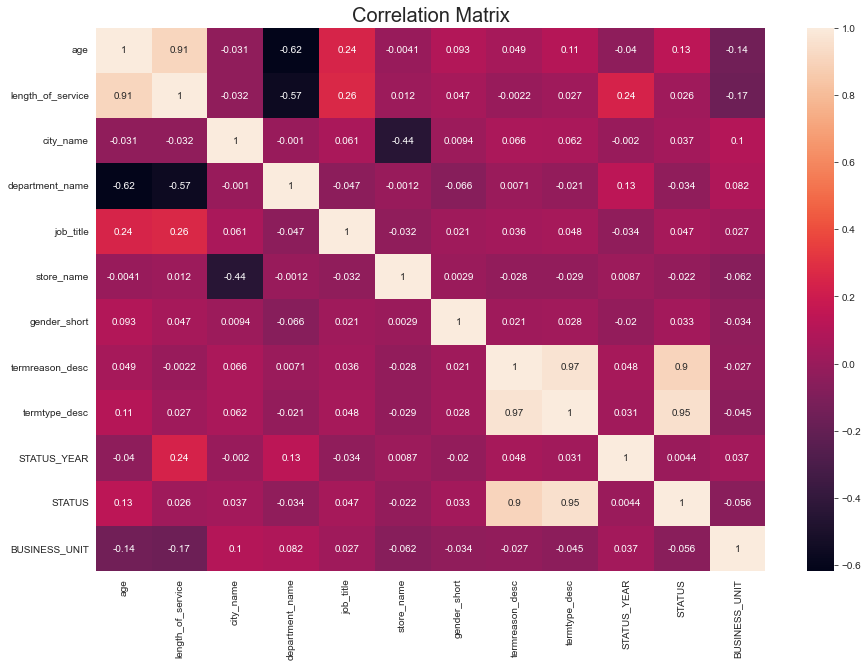

In [28]:
''' correlation matrix '''
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [29]:
''' checking correlation of STATUS w.r.t other features '''
df.corr()['STATUS'].sort_values(ascending=False)[1:]

termtype_desc        0.954594
termreason_desc      0.901363
age                  0.132552
job_title            0.047283
city_name            0.037106
gender_short         0.033245
length_of_service    0.025808
STATUS_YEAR          0.004374
store_name          -0.021960
department_name     -0.033674
BUSINESS_UNIT       -0.056437
Name: STATUS, dtype: float64

In [30]:
''' dropping some columns '''
df.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)

In [31]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,0,0,0,35,0,2006,0,0
1,53,18,0,0,0,35,0,2007,0,0
2,54,19,0,0,0,35,0,2008,0,0
3,55,20,0,0,0,35,0,2009,0,0
4,56,21,0,0,0,35,0,2010,0,0


## Conclusion on EDA

## We started the analysis by exploring some trends that directly determines the attrition, and we did find some issues related to roles. Let's prepare a feedback list for the Human Resources department based on our findings:
## We can conclude that a younger employee is more likely to leave the company from the age distribution because an experienced professional between 50-60 years of age generally seeks stability in a job. The Human Resources department can come up with some strategies to retain younger talent so to prevent attrition among younger employees.
## Attrition among the Sales representatives, Auditor are high compared to other departments, justifiable due to their long working hours, comparitavely low pay scale, sheer pressure of meeting deadlines/sale targets . To prevent attrition in these roles, the human resource department should plan a strategy to maintain a healthy work-life balance among these roles and should also revise their compensation with the market standards.

## Prediction Analysis

In [32]:
''' train, test, evaluation function '''

def result(X, y, ts, rs, model):
    
    ''' train test split '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    ''' scaling '''
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    ''' prediction '''
    pred = model.predict(X_test)
    
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [33]:
''' independent and dependent features '''
X = df[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = df[['STATUS']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     12034
           1       0.55      0.08      0.15       380

    accuracy                           0.97     12414
   macro avg       0.76      0.54      0.57     12414
weighted avg       0.96      0.97      0.96     12414

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9698727243434832
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


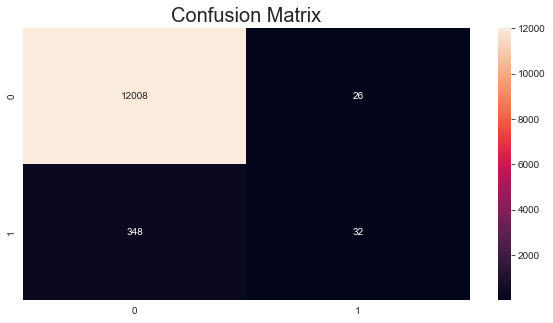

In [34]:
''' Logistic Regression '''
model = LogisticRegression()
result(X, y, 0.25, 0, model)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9638
           1       0.91      0.74      0.82       293

    accuracy                           0.99      9931
   macro avg       0.95      0.87      0.91      9931
weighted avg       0.99      0.99      0.99      9931

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.990333299768402
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


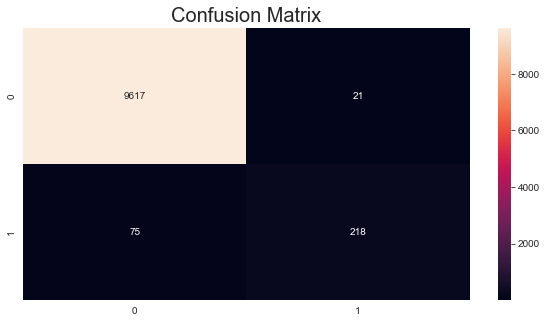

In [38]:
''' RandomForest Classifier '''
rf = RandomForestClassifier()
result(X, y, 0.20, 42, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9627
           1       0.77      0.45      0.57       304

    accuracy                           0.98      9931
   macro avg       0.87      0.72      0.78      9931
weighted avg       0.98      0.98      0.98      9931

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9789547880374585
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


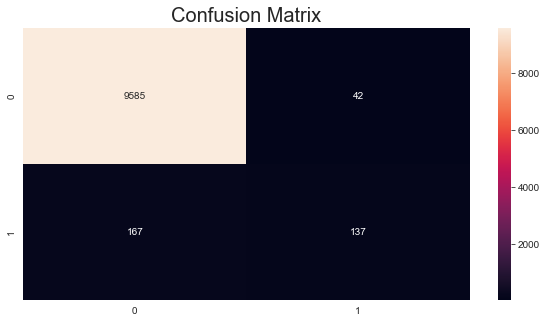

In [40]:
''' KNN '''
knn = KNeighborsClassifier()
result(X, y, 0.20, 25, knn)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14458
           1       0.97      0.75      0.85       438

    accuracy                           0.99     14896
   macro avg       0.98      0.88      0.92     14896
weighted avg       0.99      0.99      0.99     14896

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9920112781954887
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


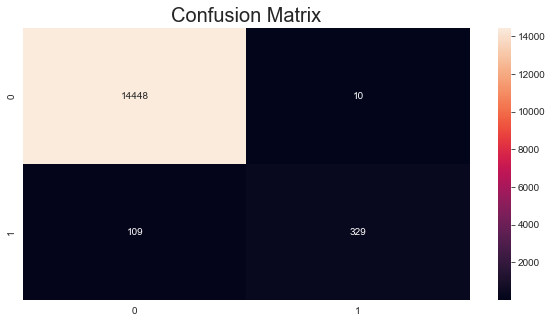

In [43]:
"""Extreme Gradient Boost Classifier"""
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gbtree', eta = 0.2)
result(X, y, 0.30, 25, xgb)

## Conclusion on Prediction

## The above machine learning models offer us an vision that how well data predicts on the unknown values. Here, as per the accuracy score, the XGBoost Classifier gives the best results, therefore we use can use this model for all our further predictions. This brings me to the end of my project.

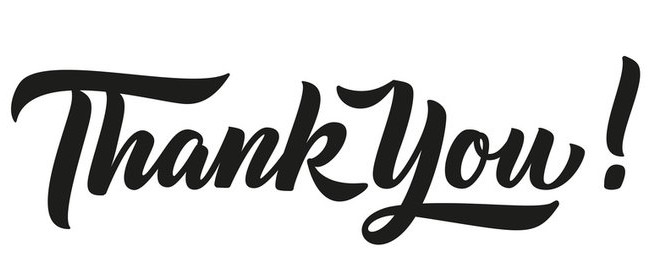